In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
!pip install umap-learn

In [24]:
import os
import json
import numpy as np
import tqdm
import umap
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from PIL import Image

In [4]:
def load_png_directory(directory):
    png_files = [f for f in os.listdir(directory) if f.endswith('.png')]
    if len(png_files) == 0: raise ValueError()
    images = []
    padded_images = []
    max_width, max_height = 0, 0
    for file in tqdm.tqdm(png_files):
        image = Image.open(os.path.join(directory, file)).convert('RGB')
        width, height = image.size
        max_width = max(max_width, width)
        max_height = max(max_height, height)
        image_array = np.array(image)
        images.append(image_array)
    for image in images:
        padded_image = np.full((max_height, max_width, 3), 255, dtype=np.uint8)
        x_offset = (max_width - image.shape[1]) // 2
        y_offset = (max_height - image.shape[0]) // 2
        padded_image[y_offset:y_offset+image.shape[0], x_offset:x_offset+image.shape[1], :] = image
        padded_images.append(padded_image)
    return images, np.array(padded_images), png_files

In [ ]:
images_o, images, png_files = load_png_directory("../data/data/minifigures")

100%|█████████████████████████████████████████████████████████████████████████▋| 6775/6801 [02:37<00:00, 28.92it/s]

In [ ]:
ds = json.load(open("../data/data/dataset.json"))
labels = set([lbl for v in ds.values() for lbl in v])
labels = { lbl: [fn for fn, lbls in ds.items() if lbl in lbls] for lbl in labels }

In [ ]:
labels.keys()

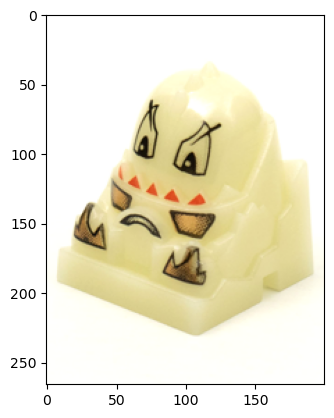

In [8]:
%matplotlib inline
plt.imshow(images_o[0])
plt.show()

In [38]:
def embed(images, labels=None):
    num_images, height, width, channels = images.shape
    image_data = images.reshape((num_images, height * width * channels))
    embedding = umap.UMAP(verbose=True).fit_transform(image_data, y=labels)
    return embedding

In [10]:
def img_trans(image):
    img = Image.fromarray(image).convert('RGBA')
    width, height = img.size
    pixdata = img.load()
    for y in range(height):
        for x in range(width):
            if pixdata[x, y] == (255, 255, 255, 255):
                pixdata[x, y] = (255, 255, 255, 0)
    return img

In [11]:
y = []
for file in png_files:
    for i, lbl in enumerate(["human", "robot", "alien"]):
        if file.replace(".png", "") in labels[lbl]: 
            y.append(i)
            break
    else:
        y.append(-1)

In [36]:
np.unique(y, return_counts=True)

(array([-1,  0,  1,  2]), array([6665,   76,   30,   30], dtype=int64))

In [42]:
%matplotlib notebook

In [12]:
embedding = embed(images)

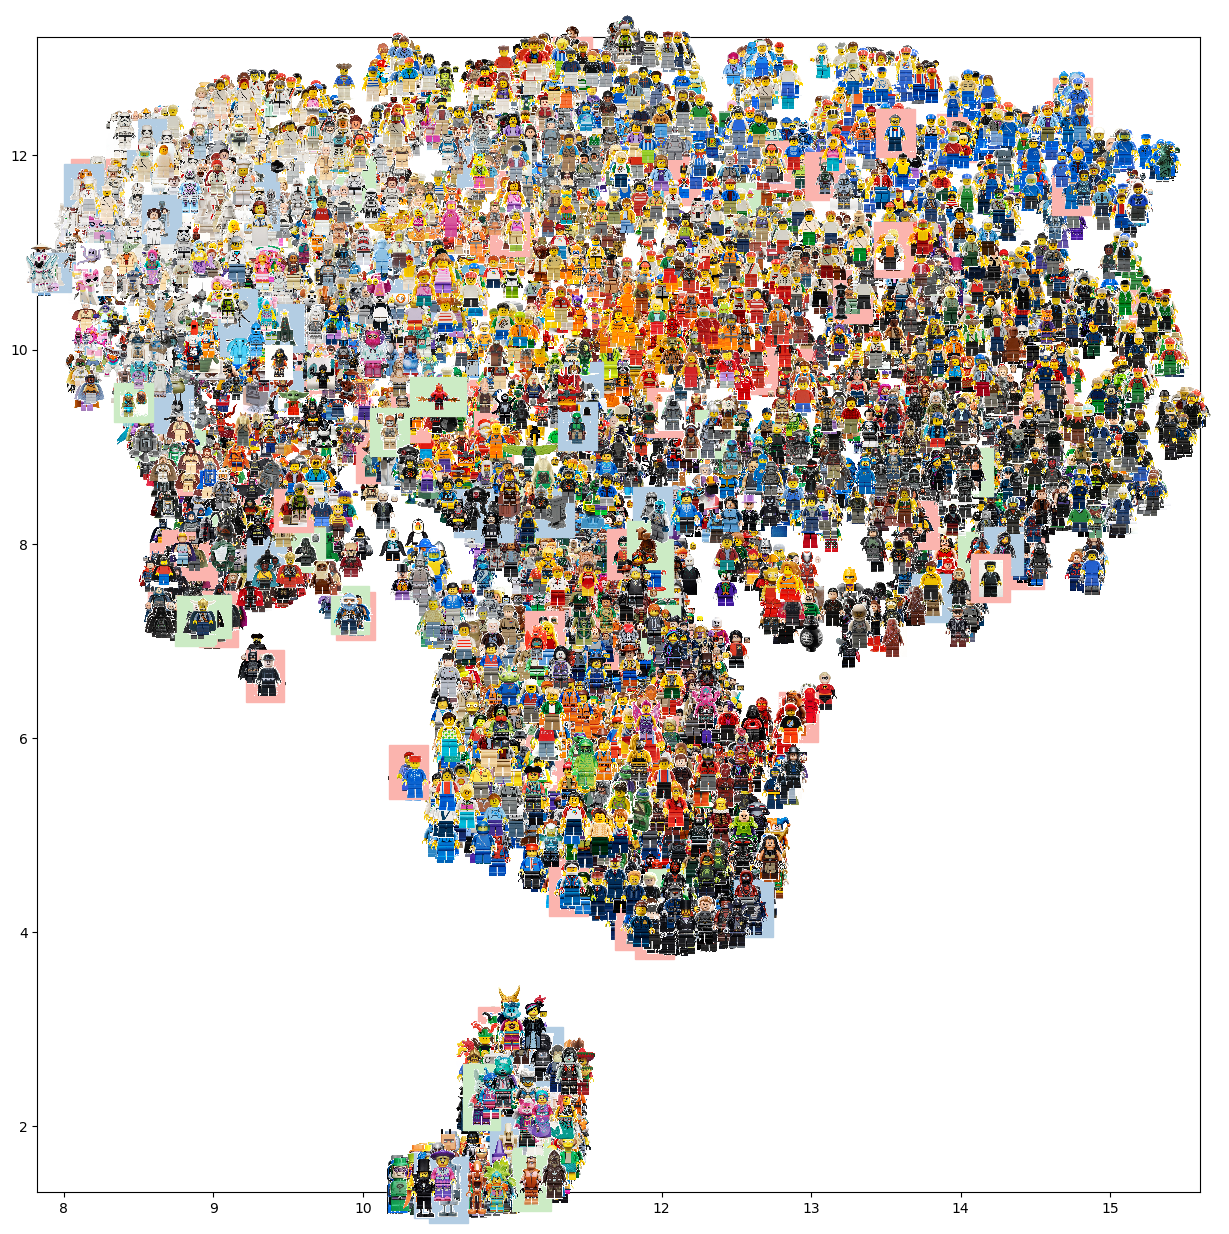

In [34]:
fig, ax = plt.subplots(figsize=(15, 15))

plt.xlim(np.min(embedding[:,0]), np.max(embedding[:,0]))
plt.ylim(np.min(embedding[:,1]), np.max(embedding[:,1]))

for i, t in enumerate(embedding):
    ab = AnnotationBbox(
        OffsetImage(img_trans(images_o[i]), zoom=0.1), (t[0], t[1]),
        bboxprops={"color": mpl.colormaps['Pastel1'](y[i]) if y[i] > -1 else "#ffffff00", "fill": True}
    )
    ax.add_artist(ab)

plt.show()

In [39]:
embedding = embed(images, y)

UMAP( verbose=True)
Sat Mar 11 12:01:16 2023 Construct fuzzy simplicial set
Sat Mar 11 12:01:26 2023 Finding Nearest Neighbors
Sat Mar 11 12:01:29 2023 Building RP forest with 9 trees
Sat Mar 11 12:05:06 2023 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	Stopping threshold met -- exiting after 4 iterations
Sat Mar 11 12:08:10 2023 Finished Nearest Neighbor Search
Sat Mar 11 12:09:16 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sat Mar 11 12:09:37 2023 Finished embedding


<IPython.core.display.Javascript object>


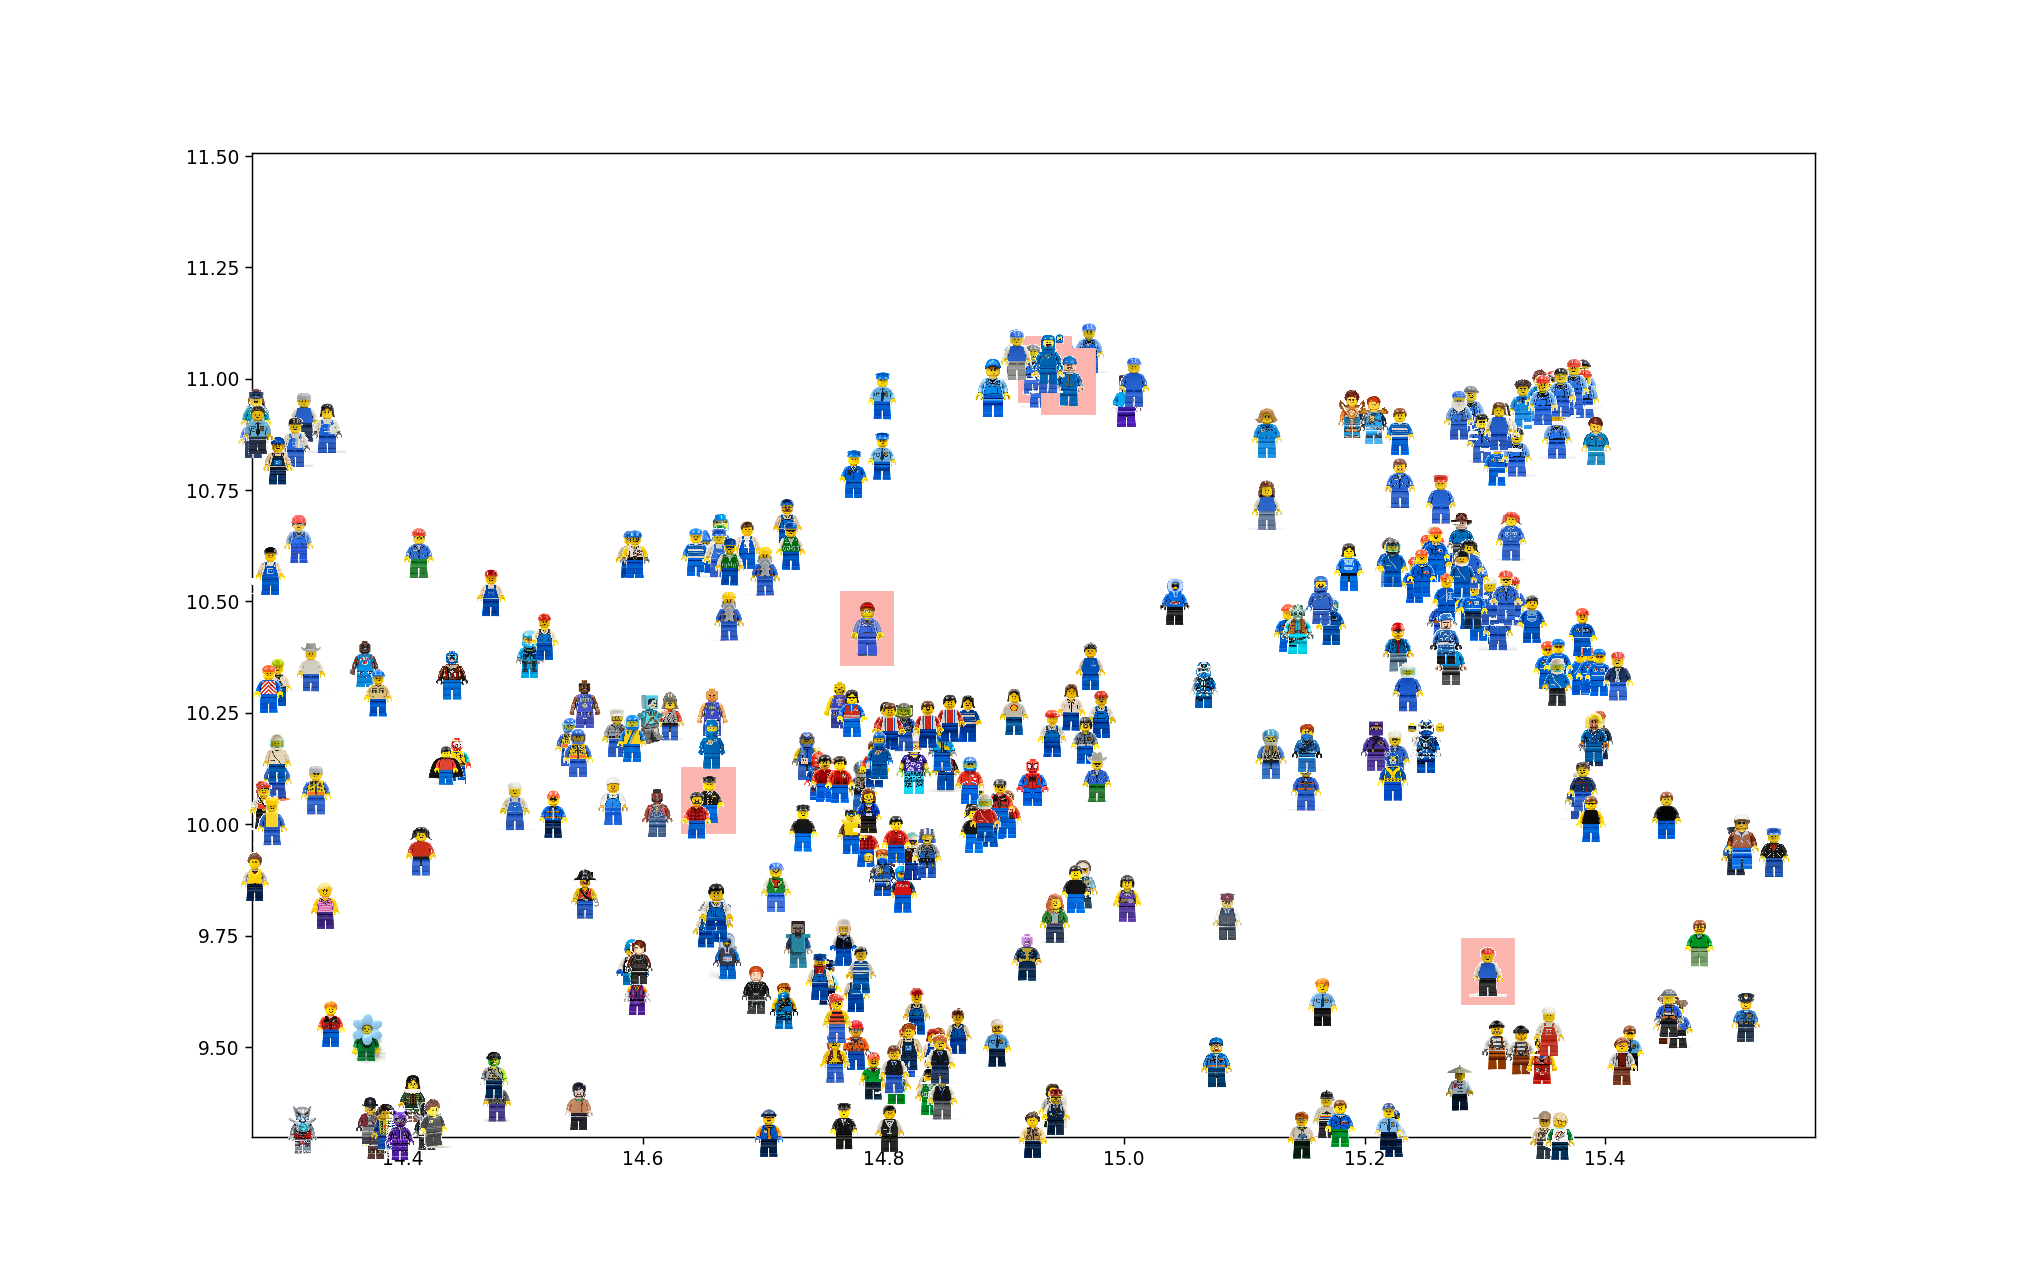

In [44]:
fig, ax = plt.subplots(figsize=(15, 15))

plt.xlim(np.min(embedding[:,0]), np.max(embedding[:,0]))
plt.ylim(np.min(embedding[:,1]), np.max(embedding[:,1]))

for i, t in enumerate(embedding):
    ab = AnnotationBbox(
        OffsetImage(img_trans(images_o[i]), zoom=0.1), (t[0], t[1]),
        bboxprops={"color": mpl.colormaps['Pastel1'](y[i]) if y[i] > -1 else "#ffffff00", "fill": True}
    )
    ax.add_artist(ab)

plt.show()